**Code Link:** https://mer.vin/2024/03/chunking-strategy/

**Agentic Chunking (Original Paper):** https://arxiv.org/pdf/2312.06648.pdf

In [126]:
!pip install -q -U langchain langchain-google-genai langchainhub langchain-core langchain-openai

In [3]:
# 1. Character Text Splitting
print("#### Character Text Splitting ####")

text = "Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. "

#### Character Text Splitting ####


#### **1. Manual Splitting**

In [ ]:
from langchain.docstore.document import Document

In [6]:
# Manual Splitting
chunks = []
chunk_size = 35 # Characters
for i in range(0, len(text), chunk_size):
  chunk = text[i:i + chunk_size]
  chunks.append(chunk)
chunks

['Text splitting in LangChain is a cr',
 'itical feature that facilitates the',
 ' division of large texts into small',
 'er, manageable segments. ']

In [7]:
documents = [Document(page_content = chunk,
                      metadata = {"source": "local"}) for chunk in chunks]
documents

[Document(page_content='Text splitting in LangChain is a cr', metadata={'source': 'local'}),
 Document(page_content='itical feature that facilitates the', metadata={'source': 'local'}),
 Document(page_content=' division of large texts into small', metadata={'source': 'local'}),
 Document(page_content='er, manageable segments. ', metadata={'source': 'local'})]

#### **2. Automatic Text Splitting**

In [8]:
from langchain.text_splitter import CharacterTextSplitter

In [12]:
text_splitter = CharacterTextSplitter(chunk_size = 35,
                                      chunk_overlap = 0,
                                      separator= "",
                                      strip_whitespace = False)
documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content='Text splitting in LangChain is a cr'),
 Document(page_content='itical feature that facilitates the'),
 Document(page_content=' division of large texts into small'),
 Document(page_content='er, manageable segments. ')]

In [13]:
text_splitter = CharacterTextSplitter(chunk_size = 35,
                                      chunk_overlap = 0,
                                      separator= " ",
                                      strip_whitespace = False)
documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content='Text splitting in LangChain is a'),
 Document(page_content='critical feature that facilitates'),
 Document(page_content='the division of large texts into'),
 Document(page_content='smaller, manageable segments.')]

#### **3. Recursive Character Text Splitting**

In [15]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [16]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65,
                                               chunk_overlap = 0) # ["\n\n", "\n", " ", ""] 65,450
documents = text_splitter.create_documents([text])
documents

[Document(page_content='Text splitting in LangChain is a critical feature that'),
 Document(page_content='facilitates the division of large texts into smaller, manageable'),
 Document(page_content='segments.')]

`content.txt`

Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments.
This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.

ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies.
It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information.

By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.

In [21]:
with open('/content/content.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [22]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 65,
                                               chunk_overlap = 0) # ["\n\n", "\n", " ", ""] 65,450
documents = text_splitter.create_documents([text])
documents

[Document(page_content='Text splitting in LangChain is a critical feature that'),
 Document(page_content='facilitates the division of large texts into smaller, manageable'),
 Document(page_content='segments.'),
 Document(page_content='This capability is vital for improving comprehension and'),
 Document(page_content='processing efficiency, especially in tasks that require detailed'),
 Document(page_content='analysis or extraction of specific contexts.'),
 Document(page_content='ChatGPT, developed by OpenAI, represents a leap forward in'),
 Document(page_content='natural language processing technologies.'),
 Document(page_content="It's a conversational AI model capable of understanding and"),
 Document(page_content='generating human-like text, allowing for dynamic interactions'),
 Document(page_content='and providing responses that are remarkably coherent and'),
 Document(page_content='contextually relevant. ChatGPT has been integrated into a'),
 Document(page_content='multitude of appl

#### **4. Document Specific Splitting - Markdown**

In [24]:
from langchain.text_splitter import MarkdownTextSplitter

In [25]:
markdown_text = """
# Fun in California

## Driving

Try driving on the 1 down to San Diego

### Food

Make sure to eat a burrito while you're there

## Hiking

Go to Yosemite
"""

In [26]:
splitter = MarkdownTextSplitter(chunk_size = 40,
                                chunk_overlap = 0)
documents = splitter.create_documents([markdown_text])
documents

[Document(page_content='# Fun in California\n\n## Driving'),
 Document(page_content='Try driving on the 1 down to San Diego'),
 Document(page_content='### Food'),
 Document(page_content="Make sure to eat a burrito while you're"),
 Document(page_content='there'),
 Document(page_content='## Hiking\n\nGo to Yosemite')]

#### **5. Document Specific Splitting - Python**

In [27]:
from langchain.text_splitter import PythonCodeTextSplitter

In [28]:
python_text = """
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

p1 = Person("John", 36)

for i in range(10):
    print (i)
"""

In [30]:
python_splitter = PythonCodeTextSplitter(chunk_size = 50,
                                         chunk_overlap = 0)
documents = python_splitter.create_documents([python_text])
documents

[Document(page_content='class Person:\n  def __init__(self, name, age):'),
 Document(page_content='self.name = name\n    self.age = age'),
 Document(page_content='p1 = Person("John", 36)'),
 Document(page_content='for i in range(10):\n    print (i)')]

#### **6. Document Specific Splitting - Javascript**

In [31]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, Language

In [33]:
javascript_text = """
// Function is called, the return value will end up in x
let x = myFunction(4, 3);

function myFunction(a, b) {
// Function returns the product of a and b
  return a * b;
}
"""

In [34]:
js_splitter = RecursiveCharacterTextSplitter.from_language(language = Language.JS,
                                                           chunk_size = 65,
                                                           chunk_overlap = 0
                                                           )
documents = js_splitter.create_documents([javascript_text])
documents

[Document(page_content='// Function is called, the return value will end up in x'),
 Document(page_content='let x = myFunction(4, 3);'),
 Document(page_content='function myFunction(a, b) {'),
 Document(page_content='// Function returns the product of a and b\n  return a * b;\n}')]

#### **7. Semantic Chunking**

In [39]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_google_genai import GoogleGenerativeAIEmbeddings

`Percentile` - all differences between sentences are calculated, and then any difference greater than the X percentile is split

In [40]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

In [41]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001",
                                          google_api_key = GOOGLE_API_KEY)

In [43]:
text_splitter = SemanticChunker(embeddings)

documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content='Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.'),
 Document(page_content="ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies. It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information. By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.")]

In [44]:
text_splitter = SemanticChunker(embeddings,
                                breakpoint_threshold_type = "percentile" # "standard_deviation", "interquartile"
                                )
documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content='Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.'),
 Document(page_content="ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies. It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information. By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.")]

In [45]:
text_splitter = SemanticChunker(embeddings,
                                breakpoint_threshold_type = "standard_deviation" # "percentile", "interquartile"
                                )
documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content="Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts. ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies. It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information. By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.")]

In [46]:
text_splitter = SemanticChunker(embeddings,
                                breakpoint_threshold_type = "interquartile" # "percentile", "standard_deviation"
                                )
documents = text_splitter.create_documents([text])
# print(documents)
documents

[Document(page_content="Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. This capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts. ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies. It's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information. By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.")]

#### **8. Agentic Chunking**

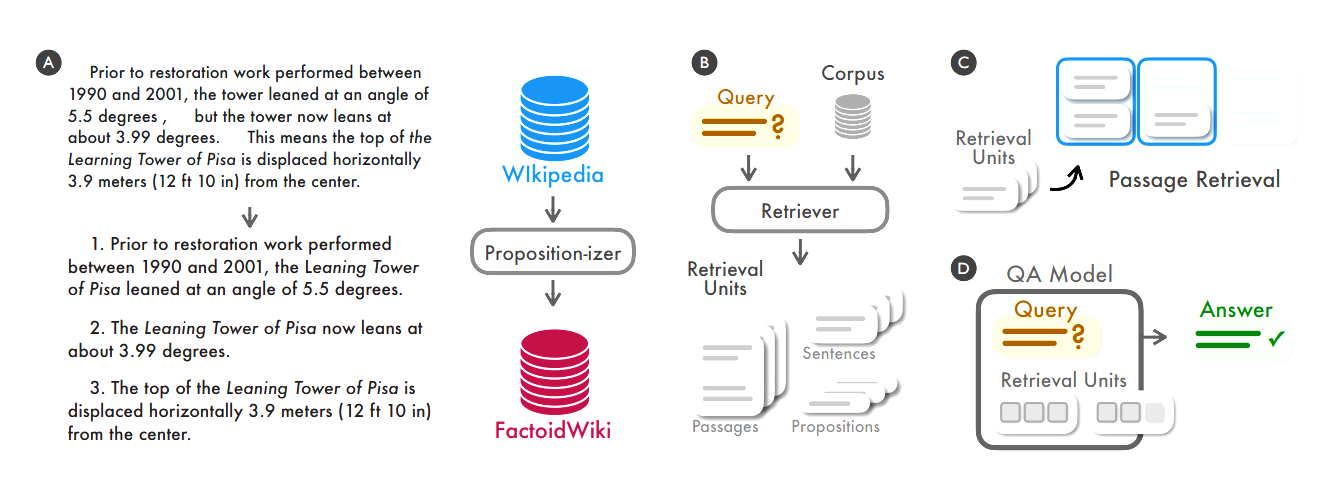

In [47]:
img_path = "/content/Agentic Chunking.png"
from PIL import Image
Image.open(img_path)

In [104]:
from langchain import hub

prompt_template = hub.pull("wfh/proposal-indexing")
prompt_template

ChatPromptTemplate(input_variables=['input'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of\ncontext.\n1. Split compound sentence into simple sentences. Maintain the original phrasing from the input\nwhenever possible.\n2. For any named entity that is accompanied by additional descriptive information, separate this\ninformation into its own distinct proposition.\n3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences\nand replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the\nentities they refer to.\n4. Present the results as a list of strings, formatted in JSON.\n\nExample:\n\nInput: Title: ¯Eostre. Section: Theories and interpretations, Connection to Easter Hares. Content:\nThe earliest evidence for the Easter Hare (Osterhase) was recorded in south-west Germany in\n

In [105]:
prompt_template.messages[0].prompt.template

'Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of\ncontext.\n1. Split compound sentence into simple sentences. Maintain the original phrasing from the input\nwhenever possible.\n2. For any named entity that is accompanied by additional descriptive information, separate this\ninformation into its own distinct proposition.\n3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences\nand replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the\nentities they refer to.\n4. Present the results as a list of strings, formatted in JSON.\n\nExample:\n\nInput: Title: ¯Eostre. Section: Theories and interpretations, Connection to Easter Hares. Content:\nThe earliest evidence for the Easter Hare (Osterhase) was recorded in south-west Germany in\n1678 by the professor of medicine Georg Franck von Franckenau, but it remained unknown in\nother parts of Germany until the 18th centur

In [106]:
from IPython.display import Markdown
Markdown(prompt_template.messages[0].prompt.template)

Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of
context.
1. Split compound sentence into simple sentences. Maintain the original phrasing from the input
whenever possible.
2. For any named entity that is accompanied by additional descriptive information, separate this
information into its own distinct proposition.
3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences
and replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the
entities they refer to.
4. Present the results as a list of strings, formatted in JSON.

Example:

Input: Title: ¯Eostre. Section: Theories and interpretations, Connection to Easter Hares. Content:
The earliest evidence for the Easter Hare (Osterhase) was recorded in south-west Germany in
1678 by the professor of medicine Georg Franck von Franckenau, but it remained unknown in
other parts of Germany until the 18th century. Scholar Richard Sermon writes that "hares were
frequently seen in gardens in spring, and thus may have served as a convenient explanation for the
origin of the colored eggs hidden there for children. Alternatively, there is a European tradition
that hares laid eggs, since a hare’s scratch or form and a lapwing’s nest look very similar, and
both occur on grassland and are first seen in the spring. In the nineteenth century the influence
of Easter cards, toys, and books was to make the Easter Hare/Rabbit popular throughout Europe.
German immigrants then exported the custom to Britain and America where it evolved into the
Easter Bunny."
Output: [ "The earliest evidence for the Easter Hare was recorded in south-west Germany in
1678 by Georg Franck von Franckenau.", "Georg Franck von Franckenau was a professor of
medicine.", "The evidence for the Easter Hare remained unknown in other parts of Germany until
the 18th century.", "Richard Sermon was a scholar.", "Richard Sermon writes a hypothesis about
the possible explanation for the connection between hares and the tradition during Easter", "Hares
were frequently seen in gardens in spring.", "Hares may have served as a convenient explanation
for the origin of the colored eggs hidden in gardens for children.", "There is a European tradition
that hares laid eggs.", "A hare’s scratch or form and a lapwing’s nest look very similar.", "Both
hares and lapwing’s nests occur on grassland and are first seen in the spring.", "In the nineteenth
century the influence of Easter cards, toys, and books was to make the Easter Hare/Rabbit popular
throughout Europe.", "German immigrants exported the custom of the Easter Hare/Rabbit to
Britain and America.", "The custom of the Easter Hare/Rabbit evolved into the Easter Bunny in
Britain and America."]

In [107]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model = "gemini-pro",
                               google_api_key = GOOGLE_API_KEY,
                               temperature = 0.7,
                               convert_system_message_to_human = True)

In [115]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

In [116]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = 'gpt-3.5-turbo',
                 openai_api_key = OPENAI_API_KEY)

In [117]:
runnable = prompt_template | llm
runnable

ChatPromptTemplate(input_variables=['input'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], template='Decompose the "Content" into clear and simple propositions, ensuring they are interpretable out of\ncontext.\n1. Split compound sentence into simple sentences. Maintain the original phrasing from the input\nwhenever possible.\n2. For any named entity that is accompanied by additional descriptive information, separate this\ninformation into its own distinct proposition.\n3. Decontextualize the proposition by adding necessary modifier to nouns or entire sentences\nand replacing pronouns (e.g., "it", "he", "she", "they", "this", "that") with the full name of the\nentities they refer to.\n4. Present the results as a list of strings, formatted in JSON.\n\nExample:\n\nInput: Title: ¯Eostre. Section: Theories and interpretations, Connection to Easter Hares. Content:\nThe earliest evidence for the Easter Hare (Osterhase) was recorded in south-west Germany in\n

In [118]:
from typing import Optional, List
from langchain_core.pydantic_v1 import BaseModel

class Sentences(BaseModel):
    sentences: List[str]

In [119]:
from langchain.chains import create_extraction_chain_pydantic
extraction_chain = create_extraction_chain_pydantic(pydantic_schema = Sentences,
                                                    llm = llm)
extraction_chain

LLMChain(prompt=ChatPromptTemplate(input_variables=['input'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], template="Extract and save the relevant entities mentioned in the following passage together with their properties.\n\nOnly extract the properties mentioned in the 'information_extraction' function.\n\nIf a property is not present and is not required in the function parameters, do not include it in the output.\n\nPassage:\n{input}\n"))]), llm=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f4e9d278e20>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f4e9d3962c0>, openai_api_key=SecretStr('**********'), openai_proxy=''), output_parser=PydanticAttrOutputFunctionsParser(pydantic_schema=<class 'langchain.chains.openai_functions.extraction.create_extraction_chain_pydantic.<locals>.PydanticSchema'>, attr_name='info'), llm_kwargs={'functions': [{'name': 'information_extraction', 'descrip

In [120]:
def get_propositions(text):
  runnable_output = runnable.invoke({"input": text}).content
  propositions = extraction_chain.invoke(runnable_output)["text"][0].sentences
  return propositions

In [121]:
paragraphs = text.split("\n\n")
paragraphs

['Text splitting in LangChain is a critical feature that facilitates the division of large texts into smaller, manageable segments. \nThis capability is vital for improving comprehension and processing efficiency, especially in tasks that require detailed analysis or extraction of specific contexts.',
 "ChatGPT, developed by OpenAI, represents a leap forward in natural language processing technologies.\nIt's a conversational AI model capable of understanding and generating human-like text, allowing for dynamic interactions and providing responses that are remarkably coherent and contextually relevant. ChatGPT has been integrated into a multitude of applications, revolutionizing the way we interact with machines and access information.",
 'By leveraging LangChain for text splitting, users can efficiently navigate and analyze vast amounts of text data, facilitating a deeper understanding and more insightful conclusions.']

In [124]:
text_propositions = []
for i, para in enumerate(paragraphs[:5]):
    propositions = get_propositions(text = para)
    text_propositions.extend(propositions)
    print (f"Done with {i}")

Done with 0
Done with 1
Done with 2


In [125]:
text_propositions

['Text splitting in LangChain is a critical feature.',
 'This critical feature facilitates the division of large texts into smaller, manageable segments.',
 'The capability of text splitting is vital for improving comprehension and processing efficiency.',
 'This capability is especially vital in tasks that require detailed analysis or extraction of specific contexts.',
 'ChatGPT was developed by OpenAI.',
 'OpenAI developed ChatGPT.',
 'ChatGPT represents a leap forward in natural language processing technologies.',
 'ChatGPT is a conversational AI model.',
 'ChatGPT is capable of understanding and generating human-like text.',
 'ChatGPT allows for dynamic interactions.',
 'ChatGPT provides responses that are remarkably coherent and contextually relevant.',
 'ChatGPT has been integrated into a multitude of applications.',
 'ChatGPT revolutionized the way we interact with machines.',
 'ChatGPT revolutionized the way we access information.',
 'Users can leverage LangChain for text split

In [127]:
from langchain_core.prompts import ChatPromptTemplate
import uuid
from langchain_openai import ChatOpenAI
import os
from typing import Optional
from langchain_core.pydantic_v1 import BaseModel
from langchain.chains import create_extraction_chain_pydantic
# from dotenv import load_dotenv
from rich import print

In [128]:
class AgenticChunker:
    def __init__(self, openai_api_key = OPENAI_API_KEY):
        self.chunks = {}
        self.id_truncate_limit = 5

        # Whether or not to update/refine summaries and titles as you get new information
        self.generate_new_metadata_ind = True
        self.print_logging = True

        if openai_api_key is None:
            openai_api_key = OPENAI_API_KEY

        if openai_api_key is None:
            raise ValueError("API key is not provided and not found in environment variables")

        self.llm = ChatOpenAI(model='gpt-3.5-turbo', openai_api_key=openai_api_key, temperature=0)

    def add_propositions(self, propositions):
        for proposition in propositions:
            self.add_proposition(proposition)

    def add_proposition(self, proposition):
        if self.print_logging:
            print (f"\nAdding: '{proposition}'")

        # If it's your first chunk, just make a new chunk and don't check for others
        if len(self.chunks) == 0:
            if self.print_logging:
                print ("No chunks, creating a new one")
            self._create_new_chunk(proposition)
            return

        chunk_id = self._find_relevant_chunk(proposition)

        # If a chunk was found then add the proposition to it
        if chunk_id:
            if self.print_logging:
                print (f"Chunk Found ({self.chunks[chunk_id]['chunk_id']}), adding to: {self.chunks[chunk_id]['title']}")
            self.add_proposition_to_chunk(chunk_id, proposition)
            return
        else:
            if self.print_logging:
                print ("No chunks found")
            # If a chunk wasn't found, then create a new one
            self._create_new_chunk(proposition)


    def add_proposition_to_chunk(self, chunk_id, proposition):
        # Add then
        self.chunks[chunk_id]['propositions'].append(proposition)

        # Then grab a new summary
        if self.generate_new_metadata_ind:
            self.chunks[chunk_id]['summary'] = self._update_chunk_summary(self.chunks[chunk_id])
            self.chunks[chunk_id]['title'] = self._update_chunk_title(self.chunks[chunk_id])

    def _update_chunk_summary(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the summary or else they could get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a group of propositions which are in the chunk and the chunks current summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the chunk new summary, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nCurrent chunk summary:\n{current_summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary']
        }).content

        return new_chunk_summary

    def _update_chunk_title(self, chunk):
        """
        If you add a new proposition to a chunk, you may want to update the title or else it can get stale
        """
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    A new proposition was just added to one of your chunks, you should generate a very brief updated chunk title which will inform viewers what a chunk group is about.

                    A good title will say what the chunk is about.

                    You will be given a group of propositions which are in the chunk, chunk summary and the chunk title.

                    Your title should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Chunk's propositions:\n{proposition}\n\nChunk summary:\n{current_summary}\n\nCurrent chunk title:\n{current_title}"),
            ]
        )

        runnable = PROMPT | self.llm

        updated_chunk_title = runnable.invoke({
            "proposition": "\n".join(chunk['propositions']),
            "current_summary" : chunk['summary'],
            "current_title" : chunk['title']
        }).content

        return updated_chunk_title

    def _get_new_chunk_summary(self, proposition):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief 1-sentence summary which will inform viewers what a chunk group is about.

                    A good summary will say what the chunk is about, and give any clarifying instructions on what to add to the chunk.

                    You will be given a proposition which will go into a new chunk. This new chunk needs a summary.

                    Your summaries should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Proposition: Greg likes to eat pizza
                    Output: This chunk contains information about the types of food Greg likes to eat.

                    Only respond with the new chunk summary, nothing else.
                    """,
                ),
                ("user", "Determine the summary of the new chunk that this proposition will go into:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_summary = runnable.invoke({
            "proposition": proposition
        }).content

        return new_chunk_summary

    def _get_new_chunk_title(self, summary):
        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    You are the steward of a group of chunks which represent groups of sentences that talk about a similar topic
                    You should generate a very brief few word chunk title which will inform viewers what a chunk group is about.

                    A good chunk title is brief but encompasses what the chunk is about

                    You will be given a summary of a chunk which needs a title

                    Your titles should anticipate generalization. If you get a proposition about apples, generalize it to food.
                    Or month, generalize it to "date and times".

                    Example:
                    Input: Summary: This chunk is about dates and times that the author talks about
                    Output: Date & Times

                    Only respond with the new chunk title, nothing else.
                    """,
                ),
                ("user", "Determine the title of the chunk that this summary belongs to:\n{summary}"),
            ]
        )

        runnable = PROMPT | self.llm

        new_chunk_title = runnable.invoke({
            "summary": summary
        }).content

        return new_chunk_title


    def _create_new_chunk(self, proposition):
        new_chunk_id = str(uuid.uuid4())[:self.id_truncate_limit] # I don't want long ids
        new_chunk_summary = self._get_new_chunk_summary(proposition)
        new_chunk_title = self._get_new_chunk_title(new_chunk_summary)

        self.chunks[new_chunk_id] = {
            'chunk_id' : new_chunk_id,
            'propositions': [proposition],
            'title' : new_chunk_title,
            'summary': new_chunk_summary,
            'chunk_index' : len(self.chunks)
        }
        if self.print_logging:
            print (f"Created new chunk ({new_chunk_id}): {new_chunk_title}")

    def get_chunk_outline(self):
        """
        Get a string which represents the chunks you currently have.
        This will be empty when you first start off
        """
        chunk_outline = ""

        for chunk_id, chunk in self.chunks.items():
            single_chunk_string = f"""Chunk ({chunk['chunk_id']}): {chunk['title']}\nSummary: {chunk['summary']}\n\n"""

            chunk_outline += single_chunk_string

        return chunk_outline

    def _find_relevant_chunk(self, proposition):
        current_chunk_outline = self.get_chunk_outline()

        PROMPT = ChatPromptTemplate.from_messages(
            [
                (
                    "system",
                    """
                    Determine whether or not the "Proposition" should belong to any of the existing chunks.

                    A proposition should belong to a chunk of their meaning, direction, or intention are similar.
                    The goal is to group similar propositions and chunks.

                    If you think a proposition should be joined with a chunk, return the chunk id.
                    If you do not think an item should be joined with an existing chunk, just return "No chunks"

                    Example:
                    Input:
                        - Proposition: "Greg really likes hamburgers"
                        - Current Chunks:
                            - Chunk ID: 2n4l3d
                            - Chunk Name: Places in San Francisco
                            - Chunk Summary: Overview of the things to do with San Francisco Places

                            - Chunk ID: 93833k
                            - Chunk Name: Food Greg likes
                            - Chunk Summary: Lists of the food and dishes that Greg likes
                    Output: 93833k
                    """,
                ),
                ("user", "Current Chunks:\n--Start of current chunks--\n{current_chunk_outline}\n--End of current chunks--"),
                ("user", "Determine if the following statement should belong to one of the chunks outlined:\n{proposition}"),
            ]
        )

        runnable = PROMPT | self.llm

        chunk_found = runnable.invoke({
            "proposition": proposition,
            "current_chunk_outline": current_chunk_outline
        }).content

        # Pydantic data class
        class ChunkID(BaseModel):
            """Extracting the chunk id"""
            chunk_id: Optional[str]

        # Extraction to catch-all LLM responses. This is a bandaid
        extraction_chain = create_extraction_chain_pydantic(pydantic_schema=ChunkID, llm=self.llm)
        extraction_found = extraction_chain.invoke(chunk_found)["text"]
        if extraction_found:
            chunk_found = extraction_found[0].chunk_id

        # If you got a response that isn't the chunk id limit, chances are it's a bad response or it found nothing
        # So return nothing
        if len(chunk_found) != self.id_truncate_limit:
            return None

        return chunk_found

    def get_chunks(self, get_type='dict'):
        """
        This function returns the chunks in the format specified by the 'get_type' parameter.
        If 'get_type' is 'dict', it returns the chunks as a dictionary.
        If 'get_type' is 'list_of_strings', it returns the chunks as a list of strings, where each string is a proposition in the chunk.
        """
        if get_type == 'dict':
            return self.chunks
        if get_type == 'list_of_strings':
            chunks = []
            for chunk_id, chunk in self.chunks.items():
                chunks.append(" ".join([x for x in chunk['propositions']]))
            return chunks

    def pretty_print_chunks(self):
        print (f"\nYou have {len(self.chunks)} chunks\n")
        for chunk_id, chunk in self.chunks.items():
            print(f"Chunk #{chunk['chunk_index']}")
            print(f"Chunk ID: {chunk_id}")
            print(f"Summary: {chunk['summary']}")
            print(f"Propositions:")
            for prop in chunk['propositions']:
                print(f"    -{prop}")
            print("\n\n")

    def pretty_print_chunk_outline(self):
        print ("Chunk Outline\n")
        print(self.get_chunk_outline())


In [129]:
if __name__ == "__main__":
    ac = AgenticChunker(OPENAI_API_KEY)

    ## Comment and uncomment the propositions to your hearts content
    propositions = [
        'The month is October.',
        'The year is 2023.',
        "One of the most important things that I didn't understand about the world as a child was the degree to which the returns for performance are superlinear.",
        'Teachers and coaches implicitly told us that the returns were linear.',
        "I heard a thousand times that 'You get out what you put in.'",
        # 'Teachers and coaches meant well.',
        # "The statement that 'You get out what you put in' is rarely true.",
        # "If your product is only half as good as your competitor's product, you do not get half as many customers.",
        # "You get no customers if your product is only half as good as your competitor's product.",
        # 'You go out of business if you get no customers.',
        # 'The returns for performance are superlinear in business.',
        # 'Some people think the superlinear returns for performance are a flaw of capitalism.',
        # 'Some people think that changing the rules of capitalism would stop the superlinear returns for performance from being true.',
        # 'Superlinear returns for performance are a feature of the world.',
        # 'Superlinear returns for performance are not an artifact of rules that humans have invented.',
        # 'The same pattern of superlinear returns is observed in fame.',
        # 'The same pattern of superlinear returns is observed in power.',
        # 'The same pattern of superlinear returns is observed in military victories.',
        # 'The same pattern of superlinear returns is observed in knowledge.',
        # 'The same pattern of superlinear returns is observed in benefit to humanity.',
        # 'In fame, power, military victories, knowledge, and benefit to humanity, the rich get richer.'
    ]

    ac.add_propositions(propositions)
    ac.pretty_print_chunks()
    ac.pretty_print_chunk_outline()
    print (ac.get_chunks(get_type='list_of_strings'))

Adding: 'The month is October.'

No chunks, creating a new one

Created new chunk (3b8af): Dates & Times

Adding: 'The year is 2023.'

No chunks found

Created new chunk (18dcc): Date & Times

Adding: 'One of the most important things that I didn't understand about the world as a child was the degree to 
which the returns for performance are superlinear.'

No chunks found

Created new chunk (e6155): Finance & Performance

Adding: 'Teachers and coaches implicitly told us that the returns were linear.'

No chunks found

Created new chunk (c3c2d): Education & Mentors

Adding: 'I heard a thousand times that 'You get out what you put in.''

No chunks found

Created new chunk (b0f1a): Effort & Investment

You have 5 chunks

Chunk #0

Chunk ID: 3b8af

Summary: This chunk contains information about specific dates and times, focusing on the month of October.

Propositions:

-The month is October.

Chunk #1

Chunk ID: 18dcc

Summary: This chunk contains information about specific dates and times.

Propositions:

-The year is 2023.

Chunk #2

Chunk ID: e6155

Summary: This chunk discusses a realization about the non-linear relationship between performance and returns.

Propositions:

-One of the most important things that I didn't understand about the world as a child was the degree to which 
the returns for performance are superlinear.

Chunk #3

Chunk ID: c3c2d

Summary: This chunk discusses the influence of teachers and coaches on our understanding of linear returns.

Propositions:

-Teachers and coaches implicitly told us that the returns were linear.

Chunk #4

Chunk ID: b0f1a

Summary: This chunk discusses the concept of reaping what you sow and the importance of effort and investment.

Propositions:

-I heard a thousand times that 'You get out what you put in.'

Chunk Outline

Chunk (3b8af): Dates & Times
Summary: This chunk contains information about specific dates and times, focusing on the month of October.

Chunk (18dcc): Date & Times
Summary: This chunk contains information about specific dates and times.

Chunk (e6155): Finance & Performance
Summary: This chunk discusses a realization about the non-linear relationship between performance and returns.

Chunk (c3c2d): Education & Mentors
Summary: This chunk discusses the influence of teachers and coaches on our understanding of linear returns.

Chunk (b0f1a): Effort & Investment
Summary: This chunk discusses the concept of reaping what you sow and the importance of effort and investment.

[
    'The month is October.',
    'The year is 2023.',
    "One of the most important things that I didn't understand about the world as a child was the degree to which 
the returns for performance are superlinear.",
    'Teachers and coaches implicitly told us that the returns were linear.',
    "I heard a thousand times that 'You get out what you put in.'"
]

In [130]:
!pip install -q -U langchain-community

In [131]:
from langchain_community.chat_models import ChatOllama
from langchain_community.vectorstores import Chroma
from langchain_community import embeddings
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [146]:
# local_llm = ChatOllama(model = "mistral")

In [ ]:
# from agentic_chunker import AgenticChunker

In [135]:
ac = AgenticChunker()
ac.add_propositions(text_propositions)
# print(ac.pretty_print_chunks())
ac.pretty_print_chunks()

Adding: 'Text splitting in LangChain is a critical feature.'

No chunks, creating a new one

Created new chunk (ace4f): Text Processing

Adding: 'This critical feature facilitates the division of large texts into smaller, manageable segments.'

No chunks found

Created new chunk (29c10): Text Organization

Adding: 'The capability of text splitting is vital for improving comprehension and processing efficiency.'

No chunks found

Created new chunk (7e7c9): Text Processing

Adding: 'This capability is especially vital in tasks that require detailed analysis or extraction of specific 
contexts.'

No chunks found

Created new chunk (fe14e): Analytical Capabilities

Adding: 'ChatGPT was developed by OpenAI.'

No chunks found

Created new chunk (fe8a1): Technology & Innovation

Adding: 'OpenAI developed ChatGPT.'

No chunks found

Created new chunk (780a4): Artificial Intelligence

Adding: 'ChatGPT represents a leap forward in natural language processing technologies.'

No chunks found

Created new chunk (a707d): Artificial Intelligence

Adding: 'ChatGPT is a conversational AI model.'

No chunks found

Created new chunk (a99a2): AI Capabilities

Adding: 'ChatGPT is capable of understanding and generating human-like text.'

No chunks found

Created new chunk (3fd6f): Artificial Intelligence

Adding: 'ChatGPT allows for dynamic interactions.'

No chunks found

Created new chunk (b3067): Technology & Interactivity

Adding: 'ChatGPT provides responses that are remarkably coherent and contextually relevant.'

No chunks found

Created new chunk (e773b): ChatGPT Capabilities

Adding: 'ChatGPT has been integrated into a multitude of applications.'

No chunks found

Created new chunk (74bc4): Applications of ChatGPT

Adding: 'ChatGPT revolutionized the way we interact with machines.'

No chunks found

Created new chunk (85cbc): Technology & Interaction

Adding: 'ChatGPT revolutionized the way we access information.'

No chunks found

Created new chunk (e24d8): Technology & Information Access

Adding: 'Users can leverage LangChain for text splitting.'

No chunks found

Created new chunk (56f5c): Text Splitting with LangChain

Adding: 'LangChain helps users efficiently navigate and analyze vast amounts of text data.'

No chunks found

Created new chunk (083bd): Text Data Analysis

Adding: 'Text splitting using LangChain facilitates a deeper understanding of the text data.'

No chunks found

Created new chunk (7d39a): Text Data Processing

Adding: 'Text splitting using LangChain helps users draw more insightful conclusions.'

No chunks found

Created new chunk (80bd8): Text Analysis

You have 18 chunks

Chunk #0

Chunk ID: ace4f

Summary: This chunk discusses the importance of text splitting in LangChain.

Propositions:

-Text splitting in LangChain is a critical feature.

Chunk #1

Chunk ID: 29c10

Summary: This chunk discusses a critical feature that helps break down large texts into more manageable sections.

Propositions:

-This critical feature facilitates the division of large texts into smaller, manageable segments.

Chunk #2

Chunk ID: 7e7c9

Summary: This chunk discusses the importance of text splitting for enhancing understanding and efficiency in 
processing information.

Propositions:

-The capability of text splitting is vital for improving comprehension and processing efficiency.

Chunk #3

Chunk ID: fe14e

Summary: This chunk discusses the importance of having the capability for tasks that involve detailed analysis or 
extraction of specific contexts.

Propositions:

-This capability is especially vital in tasks that require detailed analysis or extraction of specific 
contexts.

Chunk #4

Chunk ID: fe8a1

Summary: This chunk provides information about the development of ChatGPT by OpenAI.

Propositions:

-ChatGPT was developed by OpenAI.

Chunk #5

Chunk ID: 780a4

Summary: This chunk discusses the development of AI technology by OpenAI.

Propositions:

-OpenAI developed ChatGPT.

Chunk #6

Chunk ID: a707d

Summary: This chunk discusses the advancements in natural language processing technologies, with a focus on 
ChatGPT.

Propositions:

-ChatGPT represents a leap forward in natural language processing technologies.

Chunk #7

Chunk ID: a99a2

Summary: This chunk provides information about the capabilities and functions of ChatGPT as a conversational AI 
model.

Propositions:

-ChatGPT is a conversational AI model.

Chunk #8

Chunk ID: 3fd6f

Summary: This chunk discusses the capabilities of ChatGPT in understanding and generating human-like text.

Propositions:

-ChatGPT is capable of understanding and generating human-like text.

Chunk #9

Chunk ID: b3067

Summary: This chunk discusses the interactive capabilities of ChatGPT.

Propositions:

-ChatGPT allows for dynamic interactions.

Chunk #10

Chunk ID: e773b

Summary: This chunk discusses the capabilities of ChatGPT in providing coherent and contextually relevant 
responses.

Propositions:

-ChatGPT provides responses that are remarkably coherent and contextually relevant.

Chunk #11

Chunk ID: 74bc4

Summary: This chunk discusses the various applications where ChatGPT has been integrated.

Propositions:

-ChatGPT has been integrated into a multitude of applications.

Chunk #12

Chunk ID: 85cbc

Summary: This chunk discusses the impact of ChatGPT on human-machine interaction.

Propositions:

-ChatGPT revolutionized the way we interact with machines.

Chunk #13

Chunk ID: e24d8

Summary: This chunk discusses the impact of ChatGPT on information access.

Propositions:

-ChatGPT revolutionized the way we access information.

Chunk #14

Chunk ID: 56f5c

Summary: This chunk discusses how users can utilize LangChain for text splitting.

Propositions:

-Users can leverage LangChain for text splitting.

Chunk #15

Chunk ID: 083bd

Summary: This chunk provides information about the capabilities of LangChain in assisting users with navigating and
analyzing large volumes of text data.

Propositions:

-LangChain helps users efficiently navigate and analyze vast amounts of text data.

Chunk #16

Chunk ID: 7d39a

Summary: This chunk discusses the benefits of using LangChain for text splitting to enhance comprehension of text 
data.

Propositions:

-Text splitting using LangChain facilitates a deeper understanding of the text data.

Chunk #17

Chunk ID: 80bd8

Summary: This chunk discusses how text splitting using LangChain can assist users in drawing more insightful 
conclusions.

Propositions:

-Text splitting using LangChain helps users draw more insightful conclusions.

In [136]:
chunks = ac.get_chunks(get_type='list_of_strings')
# print(chunks)
chunks

['Text splitting in LangChain is a critical feature.',
 'This critical feature facilitates the division of large texts into smaller, manageable segments.',
 'The capability of text splitting is vital for improving comprehension and processing efficiency.',
 'This capability is especially vital in tasks that require detailed analysis or extraction of specific contexts.',
 'ChatGPT was developed by OpenAI.',
 'OpenAI developed ChatGPT.',
 'ChatGPT represents a leap forward in natural language processing technologies.',
 'ChatGPT is a conversational AI model.',
 'ChatGPT is capable of understanding and generating human-like text.',
 'ChatGPT allows for dynamic interactions.',
 'ChatGPT provides responses that are remarkably coherent and contextually relevant.',
 'ChatGPT has been integrated into a multitude of applications.',
 'ChatGPT revolutionized the way we interact with machines.',
 'ChatGPT revolutionized the way we access information.',
 'Users can leverage LangChain for text split

In [137]:
documents = [Document(page_content = chunk,
                      metadata = {"source": "local"}) for chunk in chunks]
documents

[Document(page_content='Text splitting in LangChain is a critical feature.', metadata={'source': 'local'}),
 Document(page_content='This critical feature facilitates the division of large texts into smaller, manageable segments.', metadata={'source': 'local'}),
 Document(page_content='The capability of text splitting is vital for improving comprehension and processing efficiency.', metadata={'source': 'local'}),
 Document(page_content='This capability is especially vital in tasks that require detailed analysis or extraction of specific contexts.', metadata={'source': 'local'}),
 Document(page_content='ChatGPT was developed by OpenAI.', metadata={'source': 'local'}),
 Document(page_content='OpenAI developed ChatGPT.', metadata={'source': 'local'}),
 Document(page_content='ChatGPT represents a leap forward in natural language processing technologies.', metadata={'source': 'local'}),
 Document(page_content='ChatGPT is a conversational AI model.', metadata={'source': 'local'}),
 Document(p

In [141]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001",
                                          google_api_key = GOOGLE_API_KEY)

In [143]:
from langchain_google_genai import ChatGoogleGenerativeAI
gemini_llm = ChatGoogleGenerativeAI(model = "gemini-pro",
                               google_api_key = GOOGLE_API_KEY,
                               temperature = 0.7,
                               convert_system_message_to_human = True)

In [144]:
# RAG
def rag(chunks, collection_name):
    vectorstore = Chroma.from_documents(documents = documents,
                                        collection_name = collection_name,
                                        embedding = embeddings, # embeddings.ollama.OllamaEmbeddings(model='nomic-embed-text'),
                                        )
    retriever = vectorstore.as_retriever()

    prompt_template = """Answer the question based only on the following context:
    {context}
    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(prompt_template)

    chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | gemini_llm
        | StrOutputParser()
    )
    result = chain.invoke("What is the use of Text Splitting?")
    print(result)

In [145]:
rag(documents, "agentic-chunks-11")

Text splitting is used for improving comprehension and processing efficiency, as well as facilitating a deeper 
understanding of the text data.